# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Pretendo escribir el inicio del código: librerías, leer la información de los DataFrames y observar su estructura llamando a info() y ,con el método head() imrpimir las primeras filas de cada uno.

In [1]:
# importar librerías

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames

df_instacart_orders= pd.read_csv("/datasets/instacart_orders.csv", sep= ";")
df_products = pd.read_csv("/datasets/products.csv", sep= ";")
df_order_products = pd.read_csv("/datasets/order_products.csv", sep= ";")
df_aisles = pd.read_csv("/datasets/aisles.csv", sep= ";")
df_departments = pd.read_csv("/datasets/departments.csv", sep= ";")


In [3]:
# mostrar información del DataFrame

print(df_instacart_orders.head())
print()
df_instacart_orders.info(show_counts=True)

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nu

In [4]:
# mostrar información del DataFrame

print(df_products.head())
print()
df_products.info(show_counts=True)

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame

print(df_order_products.head())
print()
df_order_products.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame

print(df_aisles.head())
print()
df_aisles.info(show_counts=True)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame

print(df_departments.head())
print()
df_departments.info(show_counts=True)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Al inicio teníamos 5 bases de datos distintas, con un separador especial, que luego de observar cual era, se colocó.
Podemos apreciar que tenemos bases de datos con un gran número de filas, muy pocos datos ausentes en comparación. 2 de 5 de nuestros DataFrames son pequeños, df_aisles y df_departmenmts. Podemos observar también que tienen nombres de columnas descriptivos (además de la información que nos entregaron para el proyecto).

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

-Trabajar valores duplicados y ausentes.

-Una vez tratados los valores ausentes, seguirá volver al tipo de datos Int64 un par de columnas de 2 DataFrames: df_instacart_orders["days_since_prior_order"] en primera instancia y también  df_order_products["add_to_cart_order"].


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print(df_instacart_orders[df_instacart_orders.duplicated()])
print(df_instacart_orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí, tenemos 15 órdenes duplicadas que ocurrieron el día miércoles (3) y a la misma hora (2:00 a.m.) en que se realizó el pedido.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(df_instacart_orders[(df_instacart_orders["order_dow"]==3) & (df_instacart_orders["order_hour_of_day"]==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
No todas las filas están duplicadas, solo algunas.

In [10]:
# Elimina los pedidos duplicados

df_instacart_orders = df_instacart_orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas

print(df_instacart_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(df_instacart_orders["order_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

-Buscamos filas de datos duplicadas y contamos el total de filas duplicadas.
-Eliminamos los datos duplicados y verificamos realizando un nuevo conteo, esperando un cero (0). 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

print(df_products[df_products.duplicated()])
print(df_products.duplicated().sum())



Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados

print(df_products["department_id"].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products["product_name"]= df_products["product_name"].str.upper()
print(df_products["product_name"].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

df_products[~df_products["product_name"].isna()].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Verificamos si existen filas completamente iguales, pero no tenemos filas duplicadas. Analizamos nuestras columnas y observamos que tenemos muchos elementos que se repiten en las columnsas. Si lo consideramos correcto, podríamos convertir algunas de nuestras columnas al tipo de datos category más adelante.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas

print(df_departments[df_departments.duplicated()])
print(df_departments.duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []
0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos

print(df_departments["department_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Revisamos si existen valores repetidos en nuestro DataFrame, iniciando con la revisión de filas completas duplicadas, encontramos que no tuvimos filas duplicadas. Revisamos los valores en la columna "department_id", encontrando que tampoco teníamos valores duplicados, todo bien.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

print(df_aisles[df_aisles.duplicated()])
print(df_aisles.duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos

print(df_aisles["aisle_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Revisamos si existen valores repetidos en nuestro DataFrame, no tuvimos filas duplicadas. Revisando los valores de la columna "aisle_id" tampoco teníamos valores duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

print(df_order_products[df_order_products.duplicated()])
print(df_order_products.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(df_order_products[df_order_products[["order_id","product_id"]].duplicated()])


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Revisamos si existen valores repetidos en nuestro DataFrame, no tuvimos filas duplicadas. Revisando los valores de la columna "order_id" junto con "product_id" tampoco teníamos valores duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

print(df_products[df_products["product_name"].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Tenemos 1258 filas de datos ausentes en la columna "product_name", pero podemos observar que los valores en "aisle_id" es 100 para todas. Se debe investigar.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(df_products[(df_products["product_name"].isna()) & (df_products["aisle_id"]==100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Si, todos los nombres de productos ausentes están relacionados con el pasillo con ID= 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

df_products[(df_products["product_name"].isna()) & (df_products["department_id"]==21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Si, todos los nombres de productos ausentes están relacionados con el departamento con ID= 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

# df_products[(df_products["aisle_id"]==100) & (df_products["department_id"]==21)]

print(df_aisles[df_aisles["aisle_id"]==100])
print(df_departments[df_departments["department_id"]==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

Encontramos que las 1258 filas que tenemos de datos ausentes en "product_name" corresponden valores "missing".

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products["product_name"]=df_products["product_name"].fillna("Unknown")

#verificamos los cambios hechos

print(df_products.query("aisle_id == 100 and department_id ==21 "))

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Buscamos valores ausentes, revisamos las correspondencias de valores en otras columnas con la falta de valores en otras.
Cambiamos los valores ausentes y verificamos si los cambios fueron hechos con éxito.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes

df_instacart_orders[df_instacart_orders["days_since_prior_order"].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Probamos buscando valores ausentes en todo el DataFrame y podemos observar que únicamente tenemos valores ausentes en "day_since_prior_order". Esto probablemente sea un error de captura de registros, probablemente el registro corresponda a un nuevo usuario que nunca antes había pedido.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes

df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(df_order_products["add_to_cart_order"].max())

print(df_order_products["add_to_cart_order"].min())

64.0
1.0


Describe brevemente cuáles son tus hallazgos.

Contamos los valores ausentes para todas las columnas de nuestro DataFrame. Hallamos que la totalidad de valores ausentes están en la columna "add_to_cart_order". Encontramos que los valores minimos y máximos para esta columna son 64 (max) y 1 (min). 


In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

df_order_id_null_values = df_order_products[df_order_products["add_to_cart_order"].isna()]["order_id"]
print(df_order_id_null_values)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

print(df_order_products.query("order_id in @df_order_id_null_values")["order_id"].value_counts())

#para este punto ya habíamos obtenido la respuesta que buscábamos


# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

df_filtered = df_order_products.query("order_id in @df_order_id_null_values")[["order_id","product_id"]].groupby("order_id")

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

df_filtered["product_id"].count().sort_values(ascending=True)

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
747668      65
2170451     65
2729254     65
2652650     65
9310        65
Name: order_id, Length: 70, dtype: int64


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

Podemos observar que si, todos los pedidos con valores ausentes en "add_to_cart_order" aparecen más de 64 veces; 65 es el número míninmo que aparece cada "order_id" con valores nulos para "add_to_cart_order".



In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products["add_to_cart_order"]= df_order_products["add_to_cart_order"].fillna("999")

df_order_products["add_to_cart_order"]= df_order_products["add_to_cart_order"].astype("int")


#verificamos los cambios
print(df_order_products.head())
print()
df_order_products.info()


   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este punto del proyecto, hemos logrado trabajar los valores ausentes y duplicados, hemos convertido en tipo de datos "int" la columna "add_to_cart_order".

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

-Trabajar valores duplicados y ausentes. Luego pudimos volver al tipo de datos "int" una columna.- Para este punto ya notamos un par de detalles relacionados en nuestros DataFrames:

-En "day_since_prior_order" tenemos valores ausentes. Esto probablemente sea un error de captura de registros, probablemente el registro corresponda a un nuevo usuario que nunca antes había pedido.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print( "Los valores en 'order_hour_of_day' oscilan entre: {a} y {b} ".format(a= (df_instacart_orders["order_hour_of_day"].min()), b= (df_instacart_orders["order_hour_of_day"].max())))

print( "Los valores en 'order_dow' oscilan entre: {c} y {d} ".format(c= (df_instacart_orders["order_dow"].min()), d= (df_instacart_orders["order_dow"].max())))


Los valores en 'order_hour_of_day' oscilan entre: 0 y 23 
Los valores en 'order_dow' oscilan entre: 0 y 6 


Escribe aquí tus conclusiones

Los valores en las columnas son razonables.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

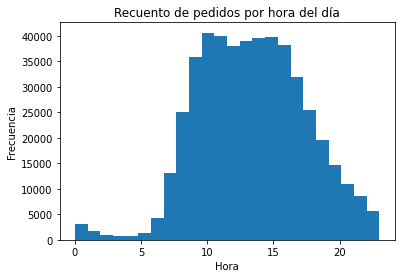

In [36]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

df_instacart_orders["order_hour_of_day"].plot(kind='hist', 
                                              title= 'Recuento de pedidos por hora del día', bins=24)
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.show()

Escribe aquí tus conclusiones

Encontramos una ventana de valores elevados de 10:00 a.m. a 04:00 p.m., siendo el punto máximo entre 10:00 a.m. y 11:00 a.m.

### [A3] ¿Qué día de la semana compran víveres las personas?

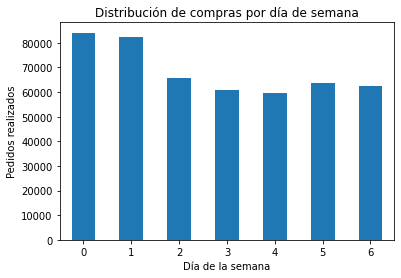

In [37]:
#Calculamos la frecuencia de cada valor en 'order_dow'
order_dow_counts = df_instacart_orders["order_dow"].value_counts().sort_index()

order_dow_counts.plot(kind="bar")
plt.title("Distribución de compras por día de semana")
plt.xlabel("Día de la semana")
plt.ylabel("Pedidos realizados")
plt.xticks(rotation=0)
plt.show()

##### Escribe aquí tus conclusiones

La mayoría de la gente realiza sus compras entre domingo y lunes. con poco más de 80k registros. El día más bajo es jueves.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

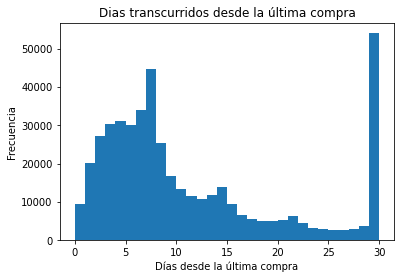

In [38]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.


df_instacart_orders["days_since_prior_order"].plot(kind='hist', title= 'Dias transcurridos desde la última compra', bins=30)
plt.xlabel("Días desde la última compra")
plt.ylabel("Frecuencia")
plt.show()

Escribe aquí tus conclusiones

Los valores mínimos y máximos nos indican que es tan variable como un mes completo, sin embargo es en la frecuencia donde notamos que en su mayoría la gente espera 7 días para realizar pedidos nuevamente. Los datos nos muestran "30" como el número con mayor frecuencia, pero no olvidemos que teníamos valores ausentes en nuestra columna... esto pudiera estar afectando nuestro análisis.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

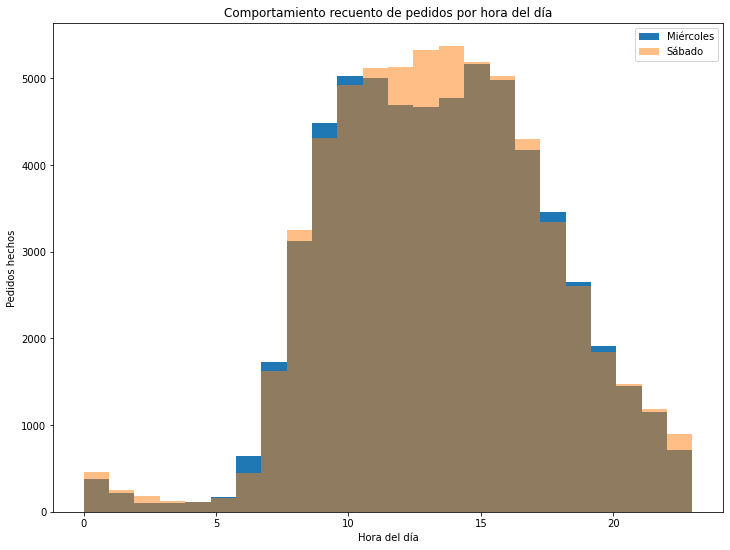

In [39]:

df_instacart_orders[df_instacart_orders["order_dow"]==3]["order_hour_of_day"].plot(kind="hist", bins=24, figsize=[12,9])
df_instacart_orders[df_instacart_orders["order_dow"]==6]["order_hour_of_day"].plot(kind="hist", alpha=0.5, bins=24)
plt.legend(["Miércoles","Sábado"])
plt.title("Comportamiento recuento de pedidos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Pedidos hechos")
plt.show()


Escribe aquí tus conclusiones
El día sábado parece tener mayor número de pedidos registrados que el miércoles, siendo su punto máximo a las 02:00 p.m. ; por otro lado, los días miércoles tinenen su punto máximo a las 03:00 p.m.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [40]:
df_instacart_orders["order_number"].value_counts().sort_index()

1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: order_number, Length: 100, dtype: int64

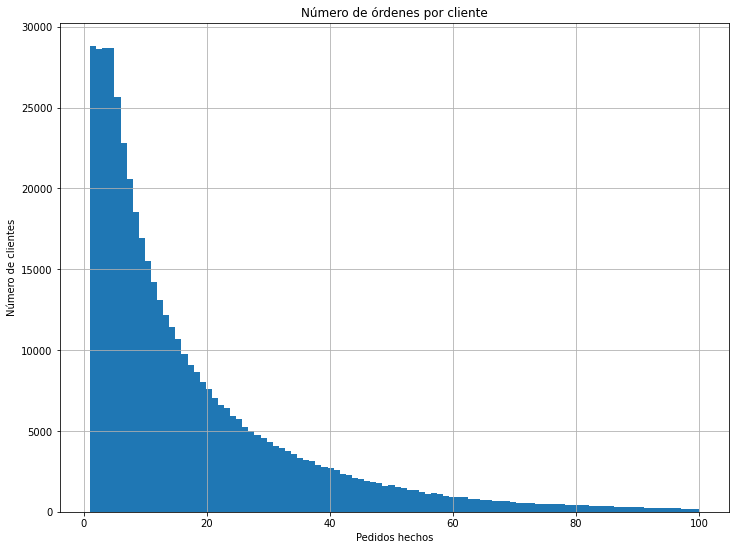

In [41]:
df_instacart_orders["order_number"].plot(kind="hist", bins=100, title="Número de órdenes por cliente", grid=True, figsize=[12,9])
plt.xlabel("Pedidos hechos")
plt.ylabel("Número de clientes")

plt.show()

Escribe aquí tus conclusiones

Pareciera una función logarítmica o buien, una gráfica de función exponencial a la inversa. Lo que nos dice que del total de clientes que ha tenido el negocio, son muy pocos los clientes que realizan más de 20 compras. Afortunadamente contamos con muchos clientes nuevos, potenciales clientes recurrentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
#aplicamos un value_counts() para obtener el conteo de nuestros productos con más apariciones en df_order_products 

df_order_products["product_id"].value_counts()

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
10543        1
5222         1
2347         1
11893        1
32074        1
Name: product_id, Length: 45573, dtype: int64

In [43]:
#Asignamos los primeros 20 valores (más altos) de nuestro conteo para id_product, nuetros índices son los id_products

popular_products = df_order_products["product_id"].value_counts()
popular_products = popular_products.iloc[:20]
print(popular_products)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [44]:
#Bucamos con query en nuestro series de productos más vendidos y filtramos el DataFrame donde están las columnas con la información solicitada

print(df_products.query("product_id in @popular_products.index")[["product_id","product_name"]])

       product_id              product_name
5875         5876             ORGANIC LEMON
8276         8277  APPLE HONEYCRISP ORGANIC
13175       13176    BAG OF ORGANIC BANANAS
16796       16797              STRAWBERRIES
21136       21137      ORGANIC STRAWBERRIES
21902       21903      ORGANIC BABY SPINACH
22934       22935      ORGANIC YELLOW ONION
24851       24852                    BANANA
24963       24964            ORGANIC GARLIC
26208       26209                     LIMES
27844       27845        ORGANIC WHOLE MILK
27965       27966       ORGANIC RASPBERRIES
28203       28204        ORGANIC FUJI APPLE
39274       39275       ORGANIC BLUEBERRIES
40705       40706    ORGANIC GRAPE TOMATOES
45006       45007          ORGANIC ZUCCHINI
47208       47209      ORGANIC HASS AVOCADO
47625       47626               LARGE LEMON
47765       47766           ORGANIC AVOCADO
49682       49683            CUCUMBER KIRBY


Escribe aquí tus conclusiones

Todos los productos más populares son frutas y verduras o algun alimento orgánico.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [45]:
#convertimos a enteros la columna "add_to_cart_order" y verificamos con info()

df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].astype("int")

df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


In [46]:
products_per_order= df_order_products.groupby("order_id")["product_id"].count()
print(products_per_order.mean())

10.098983215049127


10.098983215049127


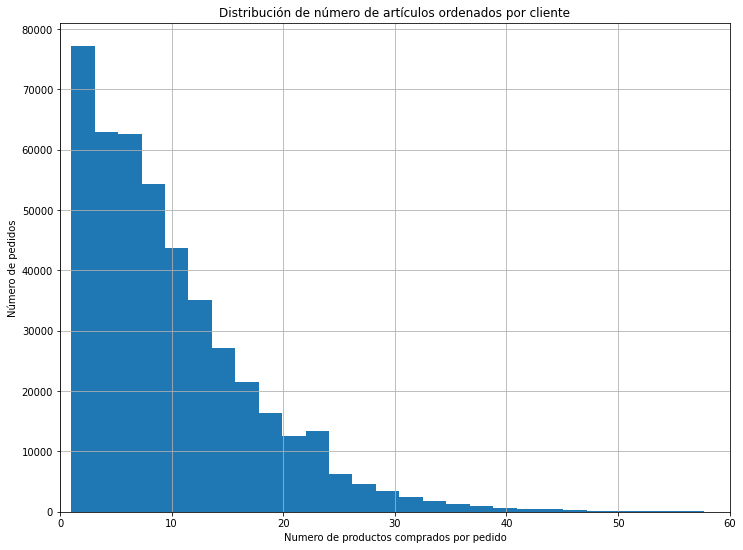

In [47]:
products_per_order= df_order_products.groupby("order_id")["product_id"].count()
print(products_per_order.mean())
products_per_order.plot(kind="hist",xlim=[0,60], bins=60, title="Distribución de número de artículos ordenados por cliente", figsize=[12,9], grid=True)
plt.xlabel("Numero de productos comprados por pedido")
plt.ylabel("Número de pedidos")
plt.show()

Escribe aquí tus conclusiones

Las personas normalmente compran 8 productos (eso dice la media), pero si revisamos un histograma para mostrar la distribución de artículos comprados, podemos observar que la mayor parte de los pedidos registrados se encuentran en los valores de 15 productos o menos. Probablemente se podría revisar en otra base de datos que tenga el monto total cobrado por orden de compra, el ticket promedio para saber qué sector de nuestros clientes deberían recibir mayor enfoque para mejorar las ventas. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
#Agrupamos los datos y realizamos la suma de los valores en la columna "reordered" para contar las veces que se ha comprado 
#cada producto, la salida irá ordenada de mayor a menor y los índices de nuestro objeto series será el "id_product"

principal_reordered_products = df_order_products.groupby("product_id")["reordered"].sum().sort_values(ascending=False)
print(principal_reordered_products)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
37593        0
14775        0
37596        0
14774        0
13714        0
Name: reordered, Length: 45573, dtype: int64


In [49]:
#Extraemos los 20 valores más altos (los 20 principales artículos que se volvieron a pedir)

principal_reordered_products = principal_reordered_products.iloc[:20]


In [50]:
#Bucamos con query en nuestro series de productos más recomprados y filtramos el DataFrame donde están las columnas con la información solicitada

print(df_products.query("product_id in @principal_reordered_products.index")[["product_id","product_name"]])

       product_id              product_name
5875         5876             ORGANIC LEMON
8276         8277  APPLE HONEYCRISP ORGANIC
13175       13176    BAG OF ORGANIC BANANAS
16796       16797              STRAWBERRIES
21136       21137      ORGANIC STRAWBERRIES
21902       21903      ORGANIC BABY SPINACH
22934       22935      ORGANIC YELLOW ONION
24851       24852                    BANANA
24963       24964            ORGANIC GARLIC
26208       26209                     LIMES
27844       27845        ORGANIC WHOLE MILK
27965       27966       ORGANIC RASPBERRIES
28203       28204        ORGANIC FUJI APPLE
39274       39275       ORGANIC BLUEBERRIES
45006       45007          ORGANIC ZUCCHINI
47208       47209      ORGANIC HASS AVOCADO
47625       47626               LARGE LEMON
47765       47766           ORGANIC AVOCADO
49234       49235       ORGANIC HALF & HALF
49682       49683            CUCUMBER KIRBY


Escribe aquí tus conclusiones

Encontramos algunos productos de los más vendidos, pero no todos, en esta lista de productos que se vuelven a comprar. Todo es comida: frutas y verduras. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos)?

#Obtenemos el total de pedidos con un conteo para id_product, nuetros índices son los id_products

popular_products = df_order_products["product_id"].value_counts().sort_index(ascending=True)
print(popular_products)


1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: product_id, Length: 45573, dtype: int64


In [52]:
#obtenemos el número de repeticiones por producto 

principal_reordered_products = df_order_products.groupby("product_id")["reordered"].sum().sort_index(ascending=True)
print(principal_reordered_products)

product_id
1        158
2          0
3         31
4         25
7          1
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 45573, dtype: int64


product_id
14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
        ... 
10485    0.0
37690    0.0
10484    0.0
10474    0.0
42984    0.0
Length: 45573, dtype: float64


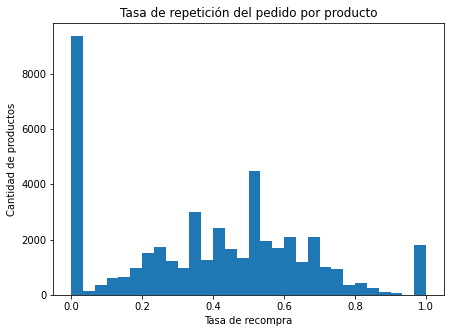

In [53]:
reordered_ratio = principal_reordered_products/popular_products
print(reordered_ratio.sort_values(ascending=False))
reordered_ratio.plot(kind="hist", bins=30, title="Tasa de repetición del pedido por producto", figsize=[7,5])
plt.xlabel("Tasa de recompra")
plt.ylabel("Cantidad de productos")
plt.show()

Escribe aquí tus conclusiones

Obtenemos un objeto series donde el ínidice es nuestro product_id y los valores son la tasa de repetición del pedido (tasa repetición de compra del producto).
Tenemos una lista en donde mientras más cercano esté el valor a 1.0, quiere decir que ese producto tiene una tasa de recompra perfecta.

En la gráfica observamos que la mayoría de los productos solo se han comprado una vez, para fines prácticos si omitimos estos datos de no recompra, observamos una distribución normal.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
#Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
#Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

#Unimos con merge nuestros DataFrame para tener un nuevo DataFrame con toda la información necesaria.
df_instacart_orders_filtered = df_instacart_orders[["order_id","user_id"]]
merged_df= df_order_products.merge(df_instacart_orders_filtered, on="order_id", how="left")
print(merged_df)


         order_id  product_id  add_to_cart_order  reordered  user_id
0         2141543       11440                 17          0    58454
1          567889        1560                  1          1   129474
2         2261212       26683                  1          1    47476
3          491251        8670                 35          1   134505
4         2571142        1940                  5          1   155995
...           ...         ...                ...        ...      ...
4545002    577211       15290                 12          1    76414
4545003   1219554       21914                  9          0   163902
4545004    692640       47766                  4          1      597
4545005    319435         691                  8          1     7124
4545006   1398151       28733                  9          0    85144

[4545007 rows x 5 columns]


user_id
2          26
4           2
5          12
6           4
7          14
         ... 
206203     27
206206     21
206207     46
206208    125
206209     25
Name: reordered, Length: 149626, dtype: int64
user_id
2          1
4          0
5          8
6          0
7         13
          ..
206203     6
206206    15
206207    41
206208    87
206209     8
Name: reordered, Length: 149626, dtype: int64
         order_id  product_id  add_to_cart_order  reordered  user_id  \
0         2141543       11440                 17          0    58454   
1          567889        1560                  1          1   129474   
2         2261212       26683                  1          1    47476   
3          491251        8670                 35          1   134505   
4         2571142        1940                  5          1   155995   
...           ...         ...                ...        ...      ...   
4545002    577211       15290                 12          1    76414   
4545003   1219554  

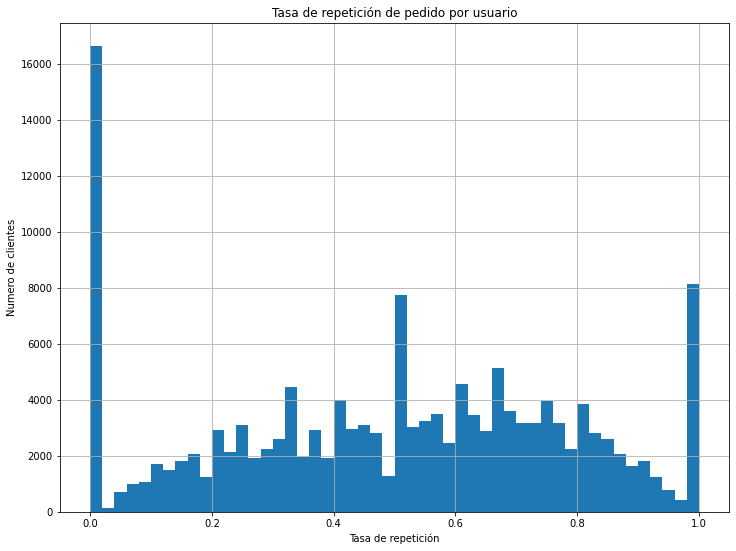

La tasa de repetición de pedido promedio es de:  0.4948531736151642


In [55]:
#Obtenemos el numero de productos total de cada usuario
grp_new = merged_df.groupby("user_id")
reordered_count = grp_new["reordered"].count()
print(reordered_count)

#Obtenemos el numero de articulos re-ordenados por usuario
grp_reordered_sum = merged_df.groupby("user_id")
reordered_sum = grp_reordered_sum["reordered"].sum()
print(reordered_sum)

#Agregamos una nueva fila a merged_df
merged_df["total_reordered_ratio"] = reordered_sum/reordered_count
print(merged_df)

merged_df["total_reordered_ratio"].plot(kind="hist", bins=50, grid=True, figsize=[12,9], title="Tasa de repetición de pedido por usuario" )
plt.xlabel("Tasa de repetición")
plt.ylabel("Numero de clientes")
plt.show()

print("La tasa de repetición de pedido promedio es de: ",merged_df["total_reordered_ratio"].mean())

Escribe aquí tus conclusiones

La diferencia es considerable: la mayor parte de los clientes no vuleven a recomprar el mismo pedido. Aproximadamente por cada 2 clientes que no vuelven a comprar por medio de la app, tenemos 1 cliente que vuelve a hacer el mismo pedido exacto.
Se parece mucho a nuestro gráfico "Tasa de repetición del pedido por producto".

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos?
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)

#Filtramos nuestro DataFrame
df_first_agregated = df_order_products[df_order_products["add_to_cart_order"]==1]
principal_products =  df_first_agregated.groupby("product_id")["add_to_cart_order"].sum()

print(principal_products)

merged_product_list = df_products.merge(principal_products, on="product_id")
cols_new={"product_id":"product_id","product_name":"product_name","aisle_id":"aisle_id","department_id":"department_id","add_to_cart_order":"times_added_first"}
merged_product_list.rename(columns=cols_new, inplace=True)

product_id
1        47
2         2
3         5
4         1
8         4
         ..
49687     1
49688     1
49690     2
49691     3
49693     3
Name: add_to_cart_order, Length: 26760, dtype: int64


In [57]:
print(merged_product_list.drop(["aisle_id","department_id"], axis="columns").sort_values(by="times_added_first", ascending=False).head(20))

       product_id                 product_name  times_added_first
13414       24852                       BANANA              15562
7127        13176       BAG OF ORGANIC BANANAS              11026
15028       27845           ORGANIC WHOLE MILK               4363
11384       21137         ORGANIC STRAWBERRIES               3946
25439       47209         ORGANIC HASS AVOCADO               3390
11786       21903         ORGANIC BABY SPINACH               3336
25732       47766              ORGANIC AVOCADO               3044
10622       19660                 SPRING WATER               2336
9050        16797                 STRAWBERRIES               2308
15102       27966          ORGANIC RASPBERRIES               2024
24024       44632   SPARKLING WATER GRAPEFRUIT               1914
26519       49235          ORGANIC HALF & HALF               1797
25658       47626                  LARGE LEMON               1737
115           196                         SODA               1733
20853     

Escribe aquí tus conclusiones

Observamos que las bananas son los 2 principales artículos agregados al carrito primero, si bien todo es comida, los primeros lugares observamos que son frutas, verduras y bebidas. Todo muy saludable salvo por la SODA.  

### Conclusion general del proyecto:

Ha sido un gran reto: Nosotros eramos libres de elegir el método para llegar a la respuesa, la cual debía ser comentada con nuestras conclusiones y al mismo tiempo ser bien comunicada, a través de palabras, gráficas y listas mostradas.
El análisis exhaustivo que hicimos nos ayudó a encontrar respues a todas las preguntas formuladas para nosotros los estudiantes.